# <center>医学论文助手</center>
<center><b>M</b>edical <b>M</b>anuscript <b>Helper</b></center>

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#提出问题" data-toc-modified-id="提出问题-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>提出问题</a></span></li><li><span><a href="#理解数据" data-toc-modified-id="理解数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>理解数据</a></span><ul class="toc-item"><li><span><a href="#导入模块" data-toc-modified-id="导入模块-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>导入模块</a></span></li><li><span><a href="#设定相关参数" data-toc-modified-id="设定相关参数-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>设定相关参数</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#数据基本信息" data-toc-modified-id="数据基本信息-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>数据基本信息</a></span></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>数据可视化</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#特征选择" data-toc-modified-id="特征选择-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>特征选择</a></span></li><li><span><a href="#评估算法" data-toc-modified-id="评估算法-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>评估算法</a></span></li><li><span><a href="#预测" data-toc-modified-id="预测-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>预测</a></span></li></ul></li></ul></div>

## 提出问题

* 明确数据分析想解决或者了解的信息是什么？

## 理解数据

### 导入模块

In [232]:
import numpy as np
import pandas as pd

### 设定相关参数

In [233]:
pd.set_option('precision', 2)  # 显示小数位数
pd.set_option('max_rows', 11)  # 显示最大行数, describe需要11行
pd.set_option('max_colwidth',40)
# pd.reset_option('precision')  # 重置显示设置，其余选项类似

### 导入数据
* 将pd.read_csv('...')内数据文件链接替换为相关数据文件的网址
* 数据第一列为分组标识

In [234]:
data = pd.read_csv('./data/duct/duct.csv')
# data = pd.read_excel('./data/duct/duct.xlsx')

### 数据基本信息

* 数据基本结构

In [235]:
data

,group,age,menopause,gestation,pain,ectasia,multiple,distance,size
0,0,47,0,1,1,0,1,0.0,1.0
1,0,47,0,1,1,0,1,0.0,0.0
2,0,44,0,1,0,0,1,0.0,0.0
3,0,44,0,1,0,0,1,NaN,1.0
4,0,44,0,1,0,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...
469,1,48,0,1,1,0,0,0.0,0.0
470,1,48,0,1,1,0,0,0.0,1.0
471,1,51,1,1,0,0,0,1.0,0.0
472,1,41,0,1,0,0,0,NaN,1.0


* 设定数据类型

In [236]:
data[['group', 'menopause', 'gestation', 'pain', 'ectasia', 'multiple', 'distance', 'size']] = data[[
    'group', 'menopause', 'gestation', 'pain', 'ectasia', 'multiple', 'distance', 'size']].astype('category')

In [237]:
data.dtypes

group        category
age             int64
menopause    category
gestation    category
pain         category
ectasia      category
multiple     category
distance     category
size         category
dtype: object

* 数据基本统计信息

In [238]:
data.describe(include='all')

,group,age,menopause,gestation,pain,ectasia,multiple,distance,size
count,474.0,474.00,474.0,474.0,474.0,474.0,474.0,393.0,468.0
unique,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.0
freq,255.0,NaN,413.0,408.0,389.0,436.0,285.0,217.0,235.0
mean,NaN,41.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 分组情况（按第一列分组）

In [239]:
chisq = data.groupby([data['group'], data['gestation']]).size()
print(chisq)

group  gestation
0      0             52
       1            203
1      0             14
       1            205
dtype: int64


In [240]:
pd.crosstab(data['group'], data['gestation'], margins=True)

gestation,0,1,All
group,,,
0,52,203,255
1,14,205,219
All,66,408,474


* 卡方检验（2*2表格）
    - 所有的理论数T≥5并且总样本量n≥40，用Pearson卡方进行检验。
    - 如果理论数T＜5但T≥1，并且1≥40，用连续性校正的卡方进行检验。
    - 如果有理论数T＜1或n＜40，则用Fisher’s检验。
    - 非2*2表格直接使用stats.chi2_contingency(chisq_matrix)

* R×C表卡方检验应用条件：
    - R×C表中理论数小于5的格子不能超过1／5；
    - 不能有小于1的理论数。如果实验中有不符合R×C表的卡方检验，可以通过增加样本数、列合并来实现。

In [241]:
from scipy import stats
import numpy as np
chisq_matrix = np.array([[chisq[0, 0], chisq[0, 1]],
                         [chisq[1, 0], chisq[1, 1]]])
stats.chi2_contingency(chisq_matrix, correction=False)  # Pearson
# stats.chi2_contingency(chisq_matrix) # 连续性校正
# stats.fisher_exact(chisq_matrix)

(19.26554414601531,
 1.1374054933276042e-05,
 1,
 array([[ 35.50632911, 219.49367089],
        [ 30.49367089, 188.50632911]]))

* 数据相关性

In [242]:
data.corr()

,age
age,1.0


* 数据高斯分布偏离

In [243]:
data.skew()

group        1.53e-01
age          8.69e-02
menopause    2.22e+00
gestation   -2.09e+00
pain         1.68e+00
ectasia      3.10e+00
multiple    -4.15e-01
distance     2.11e-01
size        -8.57e-03
dtype: float64

### 数据可视化

In [244]:
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

* 单变量直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0D0E77A90>]],
      dtype=object)

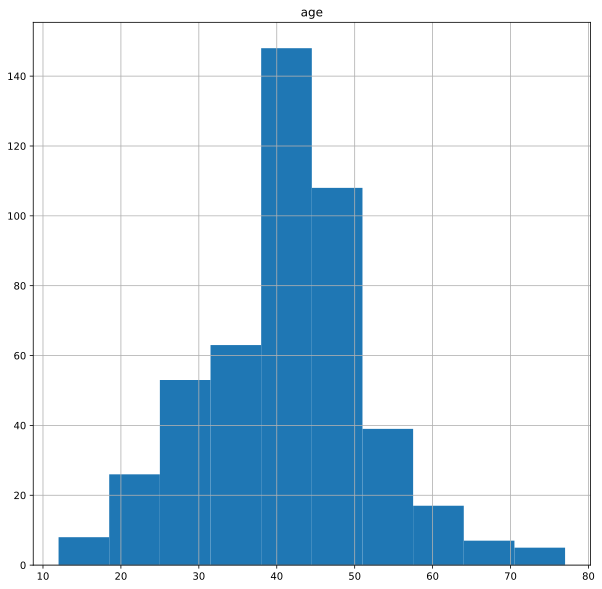

In [245]:
data.hist(figsize=(10, 10))

* 单变量密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0D0ED97B8>,
      dtype=object)

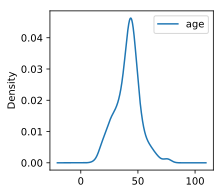

In [246]:
data.plot(
    kind='density',
    subplots=True,
    figsize=(10, 10),
    layout=(3, 3),
    sharex=False)

* 单变量箱图

In [247]:
# data.plot(
#     kind='box', subplots=True, figsize=(10, 10), layout=(3, 3), sharex=False)

* 多变量相关矩阵图

In [248]:
# import numpy as np
# correlations = data.corr()
# fig = pyplot.figure()
# ax = fig.add_subplot('111')
# ax.matshow(correlations, vmin=-1, vmax=1)
# ticks = np.arange(0, 9, 1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(data.columns)
# ax.set_yticklabels(data.columns)
# fig.set_size_inches(10, 10)

* 散点矩阵图

In [249]:
# pd.plotting.scatter_matrix(data, figsize=(15,15));

### 数据预处理

* 数据缺失值处理

In [250]:
# traindata = data.dropna()

* 分离数据

In [251]:
# from sklearn.model_selection import train_test_split
# array = traindata.values
# X = array[:, 1:]
# Y = array[:, 0]

1. 调整尺度

In [252]:
# from sklearn.preprocessing import MinMaxScaler
# transformer = MinMaxScaler(feature_range=(0,1))
# X = transformer.fit_transform(X)

2. 正态化数据

In [253]:
# from sklearn.preprocessing import StandardScaler
# transformer = StandardScaler().fit(X)
# X = transformer.transform(X)

3. 标准化数据

In [254]:
# from sklearn.preprocessing import Normalizer
# transformer = Normalizer().fit(X)
# X = transformer.transform(X)

4. 二值数据

In [255]:
# from sklearn.preprocessing import Binarizer
# transformer = Binarizer().fit(X)
# X = transformer.transform(X)

### 特征选择

* 单变量特征选择

In [256]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# testchi = chi2(X, Y)
# test = SelectKBest(score_func=chi2, k=2)
# fit = test.fit(X, Y)
# print(fit.scores_)
# features = fit.transform(X)
# test.get_support()

* 递归特征消除（RFE）

In [257]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver='lbfgs')
# rfe = RFE(model, 3)
# fit = rfe.fit(X, Y)
# print(fit.n_features_)
# print(fit.support_)
# print(fit.ranking_)

* 主要成分分析（PCA）

In [258]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# fit = pca.fit(X)
# print(fit.explained_variance_ratio_)
# print(fit.components_)

* 特征重要性

In [259]:
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier(n_estimators=100)
# fit = model.fit(X, Y)
# print(fit.feature_importances_)

### 评估算法

* 数据分组

In [260]:
# testsize = 0.2
# seed = 1
# X_train, X_test, y_train, y_test = train_test_split(
#     X, Y, test_size=testsize, random_state=seed)

* 评估模型

In [261]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

# models = {}
# models['LR'] = LogisticRegression(solver='liblinear')
# models['LDA'] = LinearDiscriminantAnalysis()
# models['KNN'] = KNeighborsClassifier()
# models['CART'] = DecisionTreeClassifier()
# models['NB'] = GaussianNB()
# models['SVM'] = SVC(gamma='scale')

# results = []
# for key in models:
#     kfold = KFold(n_splits=10, random_state=seed)
#     cv_results = cross_val_score(
#         models[key], X_train, y_train, cv=kfold, scoring='accuracy')
#     results.append(cv_results)

* 箱图比较算法

In [262]:
# pyplot.boxplot(results);

### 预测

In [263]:
# svm = SVC(gamma='scale')
# svm.fit(X=X_train, y=y_train)
# predictions = svm.predict(X_test)

In [264]:
# accuracy_score(y_test, predictions)

In [265]:
# confusion_matrix(y_test, predictions)

In [266]:
# print(classification_report(y_test, predictions))